# Test other backbones

In [1]:
from model.unet import UnetDynamic
from model.backbone import BackBoneResnet101Dynamic
net = UnetDynamic(BackBoneResnet101Dynamic, encoder_args = {"pretrained":False}, decoder_args = {"img_size":512})

In [1]:
from torchvision.models import resnet18, resnet101, resnet34

In [1]:
from model.backbone_resnet import BackboneResnet101
backbone_resnet101 = BackboneResnet101(encoder_args = {}, decoder_args = {})

In [5]:
from model.backbone_resnet import BackboneResnet101,BackboneResnet18, BackboneResnet34, BackboneResnet50
from model.unet import Unet
net = Unet(BackboneResnet18 , decoder_args = {"type_up" : "pixel_shuffle"})

In [1]:
from model.backbone import BackboneOriginal, BackBoneResnet18, BackBoneResnet101, BackboneResnet18VGG, BackboneDensenet121VGG,BackboneEfficientB0VGG
from model.unet import Unet
# bb = BackboneResnet18VGG(encoder_args = {}, decoder_args = {})
net = Unet(BackboneResnet18VGG,encoder_args = {"input_channel":1, "output_channel":1} , decoder_args = {"bilinear":False, "pixel_shuffle":True})

In [2]:
import torch
x = torch.empty((1, 1, 512, 512))
net(x).shape

torch.Size([1, 1, 512, 512])

# Test loss

In [3]:
from loss.loss import FocalLoss
clc = FocalLoss()
import torch
x = torch.Tensor([0.1, 0.2, 0.6, 0.3])
y = torch.Tensor([0, 1, 1, 0])
clc(x, y)

tensor(0.0415)

In [4]:
from loss.loss import DiceLoss
import torch
import torch.nn as nn
import torch.nn.functional as F

def test_BFL():
#     output = 40*(torch.randint(0,2,(1,1,32,32,32))-0.5)
    output = 40*(torch.randint(0, 2, (2,2))-0.5)
    target = torch.zeros_like(output)
    target[output<0] = 1
#     print(torch.min(output), torch.max(output))
#     print(torch.min(target), torch.max(target))
#     print(output.shape, target.shape)
#     target = torch.randint(0,2,(1,1,32,32,32))
    print(output)
    print(target)
    criterion = DiceLoss(activation = nn.Sigmoid(), epsilon = 0)   
    
    loss = criterion(output,target)
    print(loss.item())
test_BFL()

tensor([[20., 20.],
        [20., 20.]])
tensor([[0., 0.],
        [0., 0.]])
1.0


In [13]:
import numpy as np
np.round(2.0612e-09)

0.0

In [33]:

(20*0.75*2+20*0.25*2)/4


10.0

# Test visualize

In [6]:
from visualize.visualize import Visualize
vis = Visualize()

TypeError: __init__() missing 3 required positional arguments: 'current_epoch', 'epochs', and 'data'

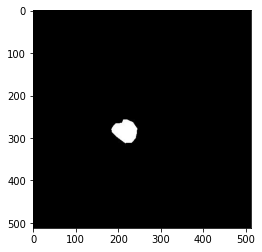

In [13]:
import matplotlib.pyplot as plt
# vis.plot_loss_update(0.1, 0.5)
image = plt.imread("E:\data\BrainTumor\masks\\7_1.jpg")
# vis.update_image(image[:,:,0])
plt.imshow(image)
plt.show()

# Test SegmentationData

In [1]:
from data.SegmentationData import SegmentationData
from config import config
data = SegmentationData(config)
# data.show_batch()

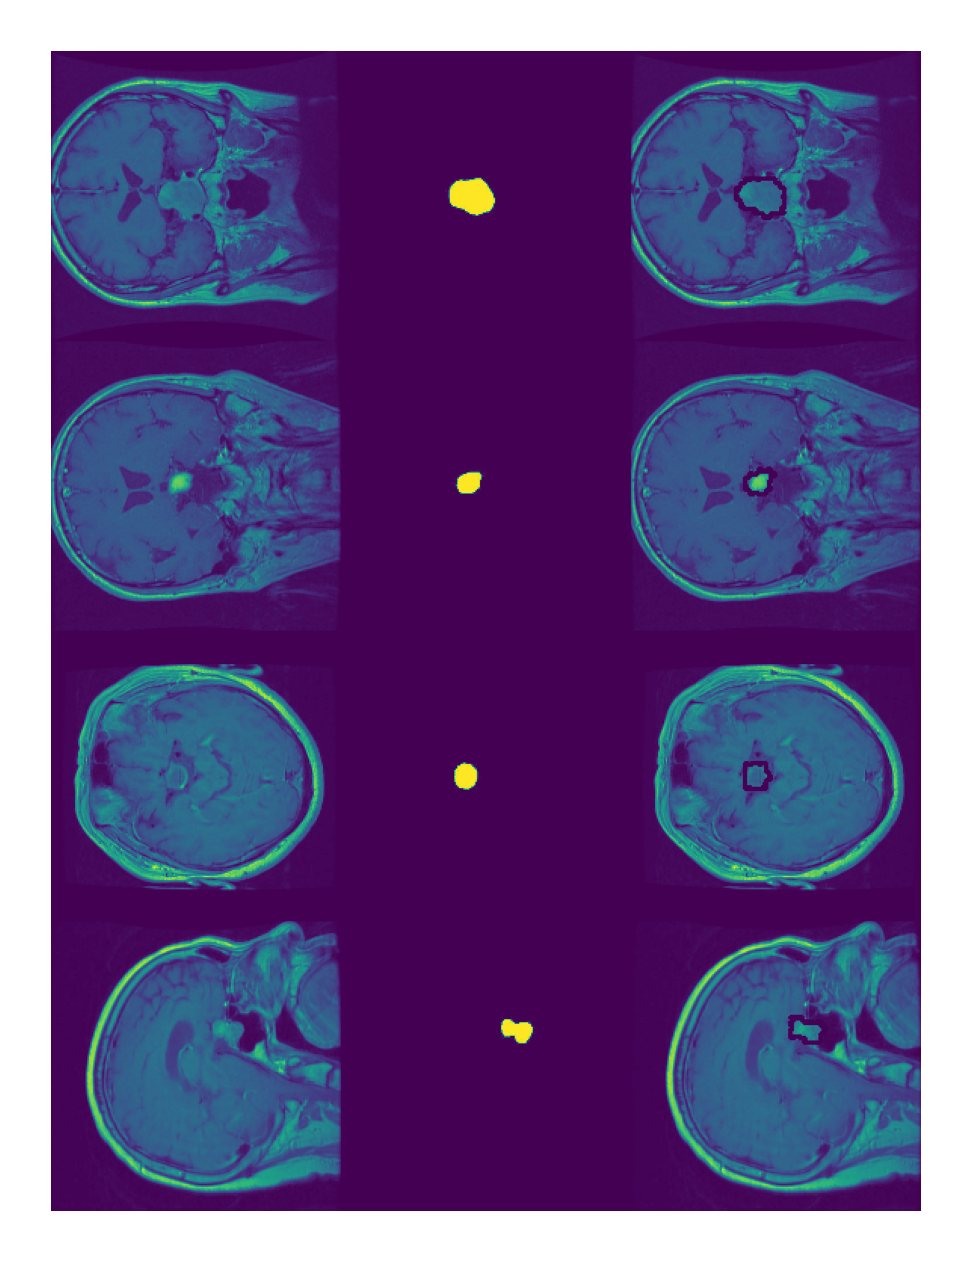

In [2]:
data.test_dataset.show_sample()

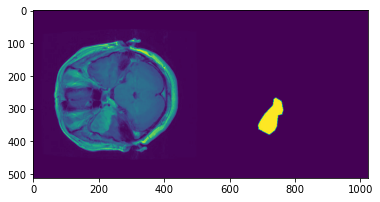

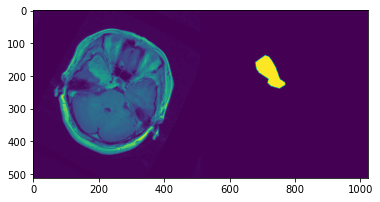

In [7]:
import matplotlib.pyplot as plt
image = plt.imread("E:\data\BrainTumor\images\\1_1.jpg")
mask = plt.imread("E:\data\BrainTumor\masks\\1_1.jpg")

import albumentations as A
from dataset.transform import visualize, RandomCrop, RandomVerticalFlip, RandomHorizontalFlip, RandomRotate
aug = A.Compose([
            RandomRotate(limit = (0,270), p=1)
        ])
visualize(aug, image, mask)

# Test trainer

In [1]:
from data.SegmentationData import SegmentationData
from config import config
from train.train import Trainer
import torch
data = SegmentationData(config)
trainer = Trainer(config, data)

In [1]:
# sampler = trainer.data.load_batch("train")
# images = sampler[0][0:1].to(trainer.device)
# labels = sampler[1][0:1].to(trainer.device)
# trainer.net.eval()
# with torch.no_grad():
#     outputs = trainer.net(images)
#     outputs_sigmoid = torch.sigmoid(outputs)

In [ ]:
trainer.train()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\segmentation\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-3435b262f1ae>", line 1, in <module>
    trainer.train()
  File "E:\vinbrain-internship\segmentation\train\train.py", line 82, in train
    self.train_one_epoch()
  File "E:\vinbrain-internship\segmentation\train\train.py", line 94, in train_one_epoch
    outputs = self.net(images)
  File "C:\Users\Admin\anaconda3\envs\segmentation\lib\site-packages\torch\nn\modules\module.py", line 727, in _call_impl
    result = self.forward(*input, **kwargs)
  File "E:\vinbrain-internship\segmentation\model\unet.py", line 26, in forward
    x = block(x, features_value[name])
  File "C:\Users\Admin\anaconda3\envs\segmentation\lib\site-packages\torch\nn\modules\module.py", line 727, in _call_impl
    result = self.forward(*input, **kwargs)
  File "E:\vinbrain-intern

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\segmentation\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-3435b262f1ae>", line 1, in <module>
    trainer.train()
  File "E:\vinbrain-internship\segmentation\train\train.py", line 82, in train
    self.train_one_epoch()
  File "E:\vinbrain-internship\segmentation\train\train.py", line 94, in train_one_epoch
    outputs = self.net(images)
  File "C:\Users\Admin\anaconda3\envs\segmentation\lib\site-packages\torch\nn\modules\module.py", line 727, in _call_impl
    result = self.forward(*input, **kwargs)
  File "E:\vinbrain-internship\segmentation\model\unet.py", line 26, in forward
    x = block(x, features_value[name])
  File "C:\Users\Admin\anaconda3\envs\segmentation\lib\site-packages\torch\nn\modules\module.py", line 727, in _call_impl
    result = self.forward(*input, **kwargs)
  File "E:\vinbrain-intern

In [6]:
trainer.crition(labels, outputs)

tensor(0.6984)

# Test Model

In [ ]:
from data.SegmentationData import SegmentationData
from config import config
data = SegmentationData(config)

In [ ]:
from model.Unet import Unet
import torch
x = torch.ones([1, 1, 192, 192])
net = Unet(1, 1, padding = 1)
x.shape, net(x).shape

In [ ]:
from model.Unet import Up
import torch
x = torch.empty([1, 1024, 4, 4])
up = Up([1024, 512, 512])
up(x)

In [ ]:
import torch.nn as nn
from model.Unet import MultiConv
MultiConv([2, 1, 1], True, 0)(x1)

nn.BatchNorm2d(1)(x2).sum()

In [ ]:
import torch
import torch.nn.functional as F



diffY = x2.size()[2] - x1.size()[2]
diffX = x2.size()[3] - x1.size()[3]

x2 = F.pad(x2, [
        -diffX//2, -diffX//2,
        -diffY//2, -diffY//2
        ])
x1.shape, x2.shape

# Test BrainTumorDataset

In [ ]:
from dataset.BrainTumorDataset import BrainTumorDataset
import torchvision.transforms as transforms

transform_train = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(256),
    transforms.ToTensor()
]
)
dataset_args = {
    "input_folder":'E:\data\BrainTumor',
}
dataset = BrainTumorDataset(dataset_args, transform_train, "train")

In [ ]:
dataset.show_sample()

# Test split train val

In [ ]:
from dataset.BrainTumorDataset import PrepairBrainTumorDataset
prepaireDataset = PrepairBrainTumorDataset('E:\data\BrainTumorRaw','E:\data\BrainTumor')
prepaireDataset.split_train_test_val()